# Lab 4 Neural Networks
* Nicholas Larsen
* Steven Larsen

In this lab we will explore different kinds of Neural Networks starting with a simple 2 layer Perceptron and ending up with a 5 Layer Perceptron with different kinds of preprocessing and 2 different adaptive learning techniques.

The dataset description can be found here:https://www.kaggle.com/muonneutrino/us-census-demographic-data/data

# Load Split and Balance

## Load into Pandas

In [1]:
import numpy as np
import pandas as pd
import missingno as mn
from sklearn.datasets import load_digits

df = pd.read_csv('./../acs2017_census_tract_data.csv')
df

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,72153750501,Puerto Rico,Yauco Municipio,6011,3035,2976,99.7,0.3,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
73997,72153750502,Puerto Rico,Yauco Municipio,2342,959,1383,99.1,0.9,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
73998,72153750503,Puerto Rico,Yauco Municipio,2218,1001,1217,99.5,0.2,0.0,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
73999,72153750601,Puerto Rico,Yauco Municipio,4380,1964,2416,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


<AxesSubplot:>

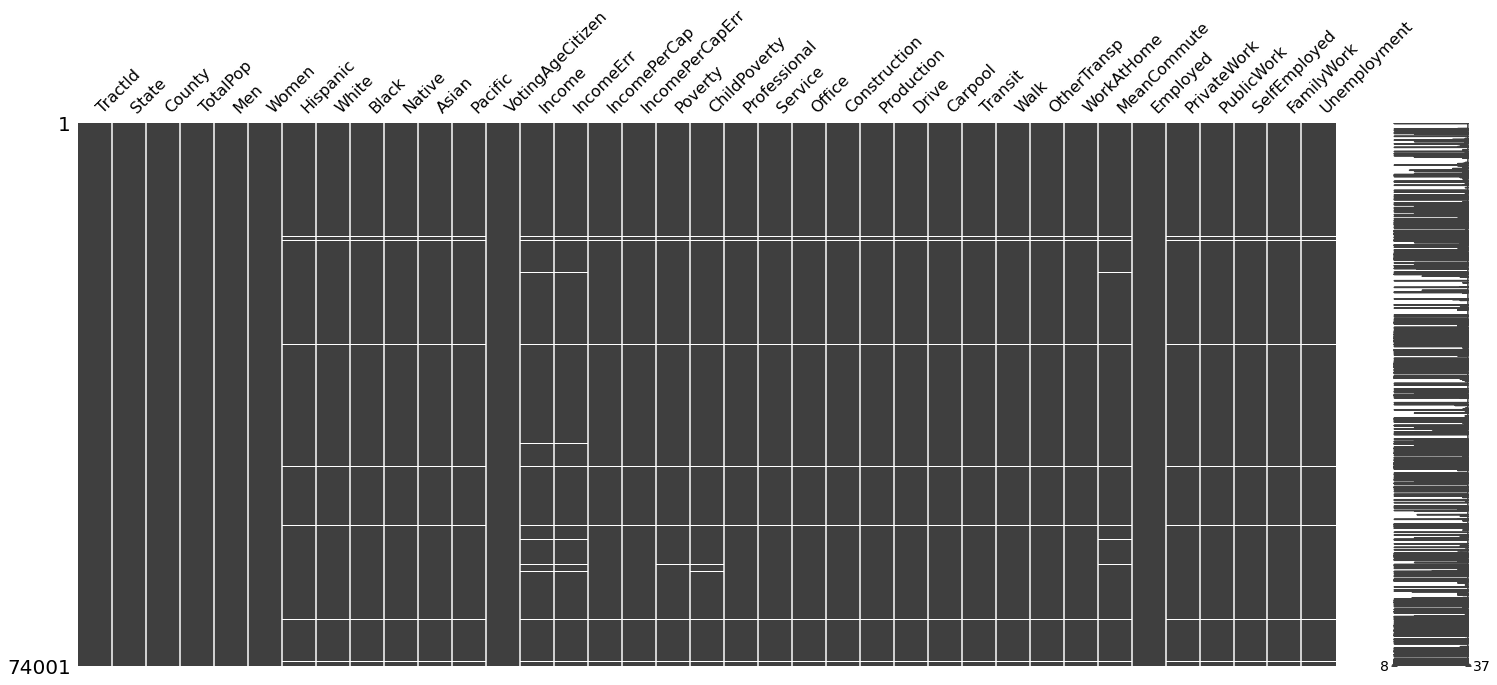

In [2]:
mn.matrix(df)

Based on this we are going to do some data clean up.  There are quite a few white lines across that data.  That represents records with large amounts of missing data across multiple features.  For those records we will throw them out. Firstly we will see the impacts of throwing out all records with at least one missing feature.

<AxesSubplot:>

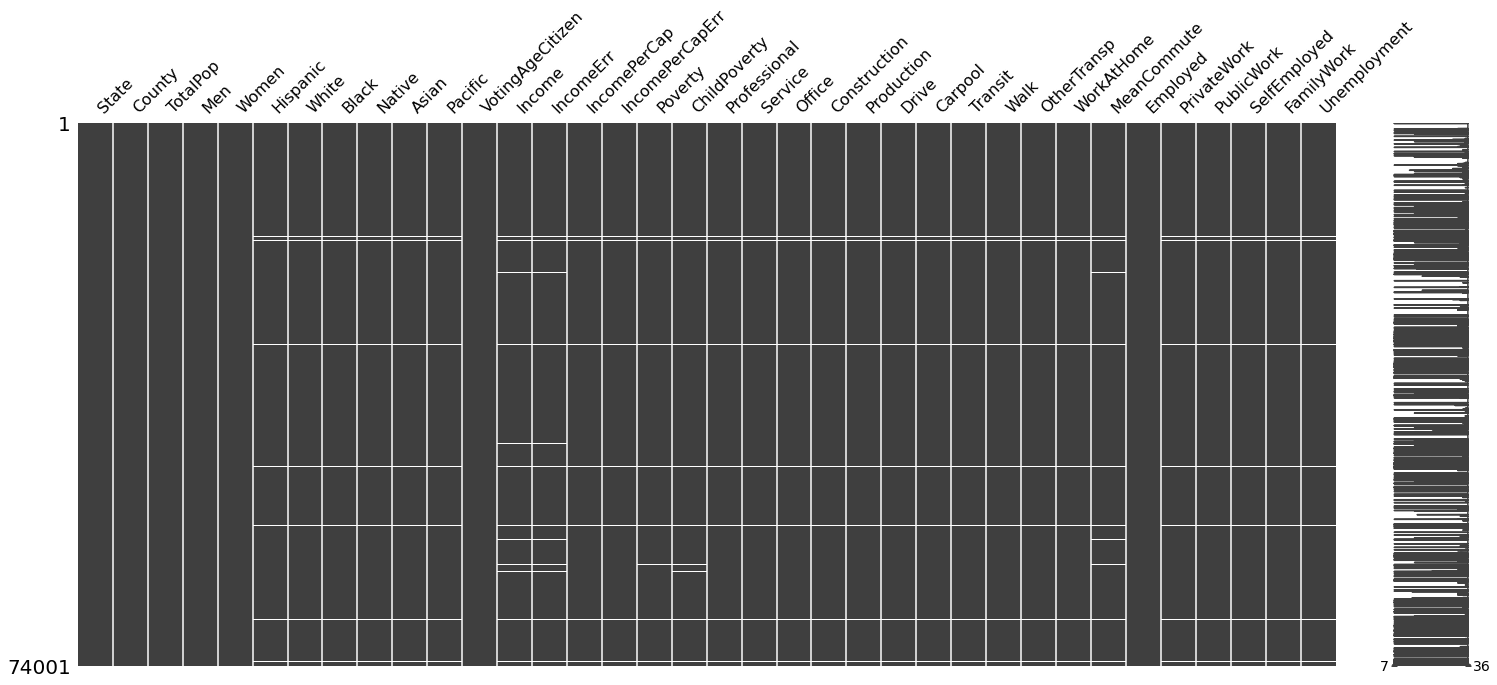

In [3]:
df = df.drop(columns='TractId')
mn.matrix(df)

<AxesSubplot:>

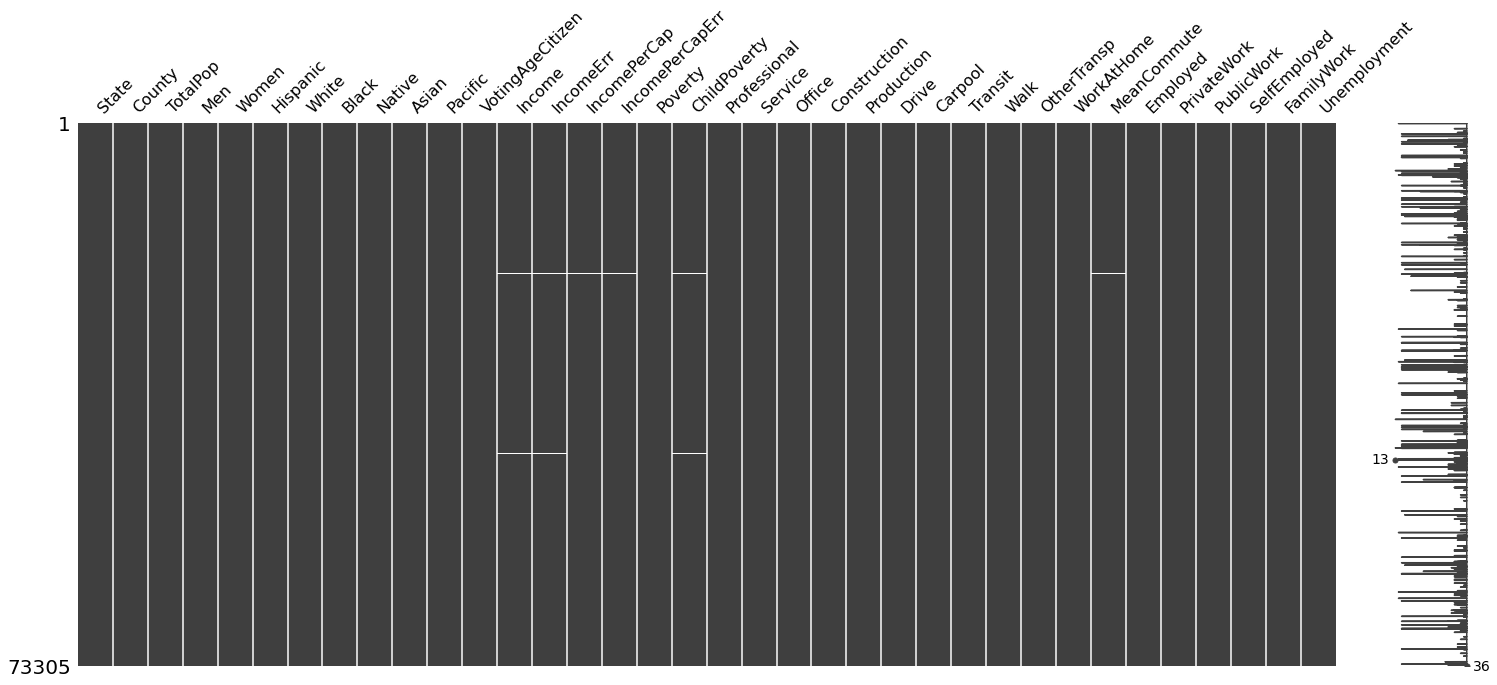

In [4]:
from numpy import nan
df = df[df.Hispanic.notnull()]
mn.matrix(df)

<AxesSubplot:>

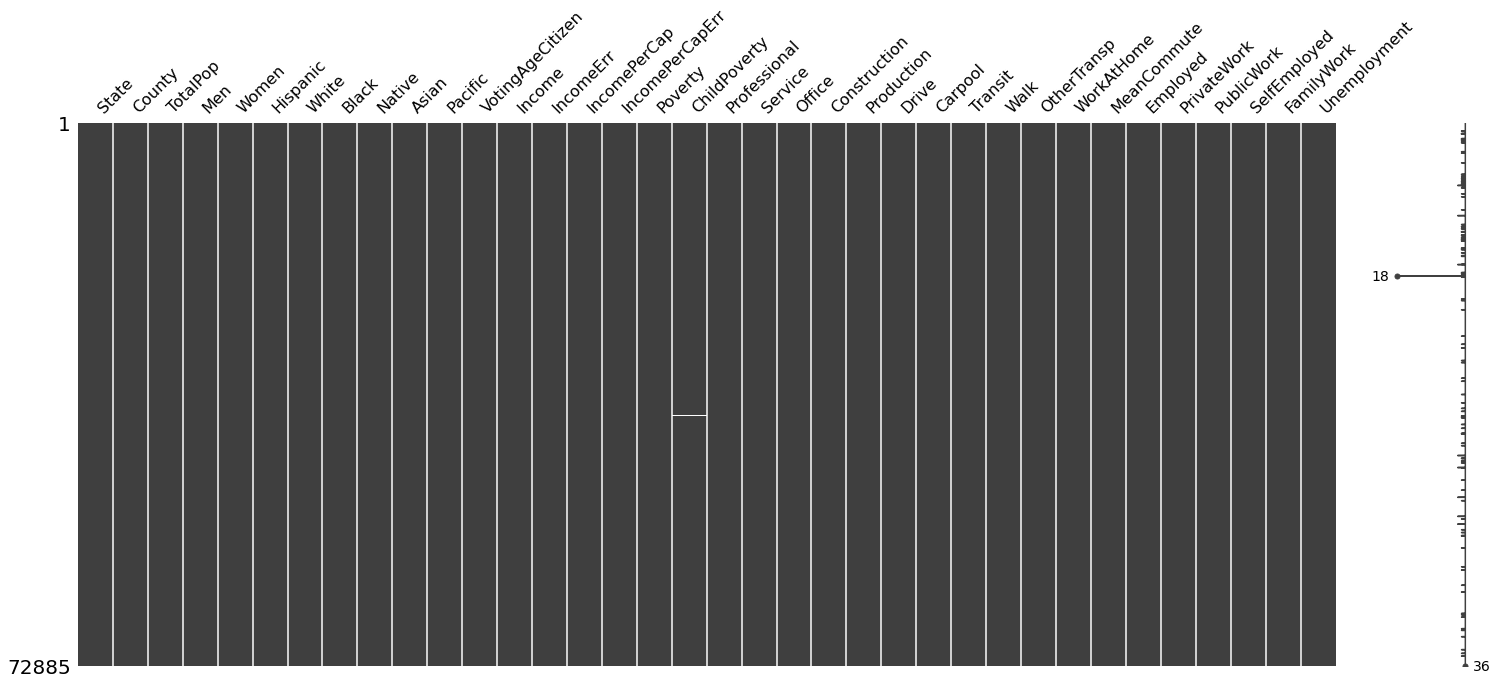

In [5]:
df = df[df.Income.notnull()]
mn.matrix(df)

<AxesSubplot:>

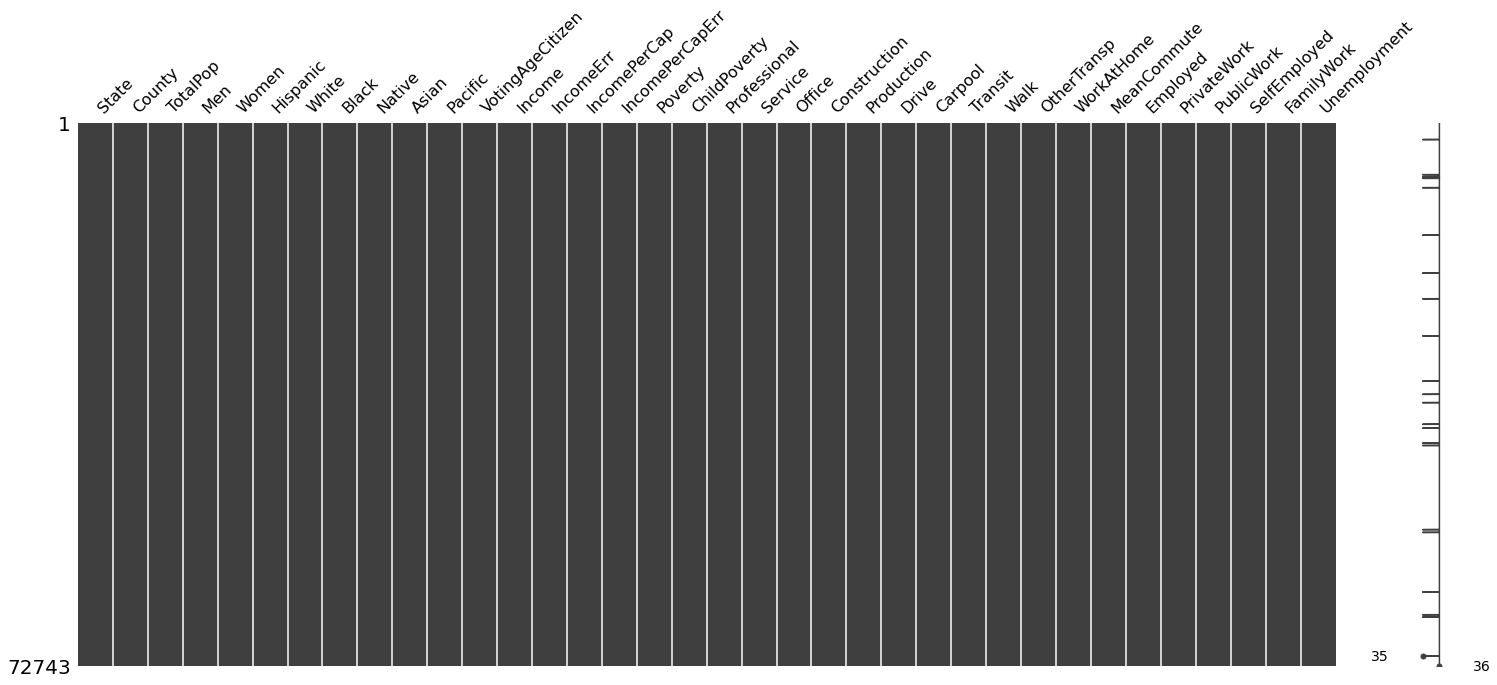

In [6]:
df = df[df.ChildPoverty.notnull()]
mn.matrix(df)

<AxesSubplot:>

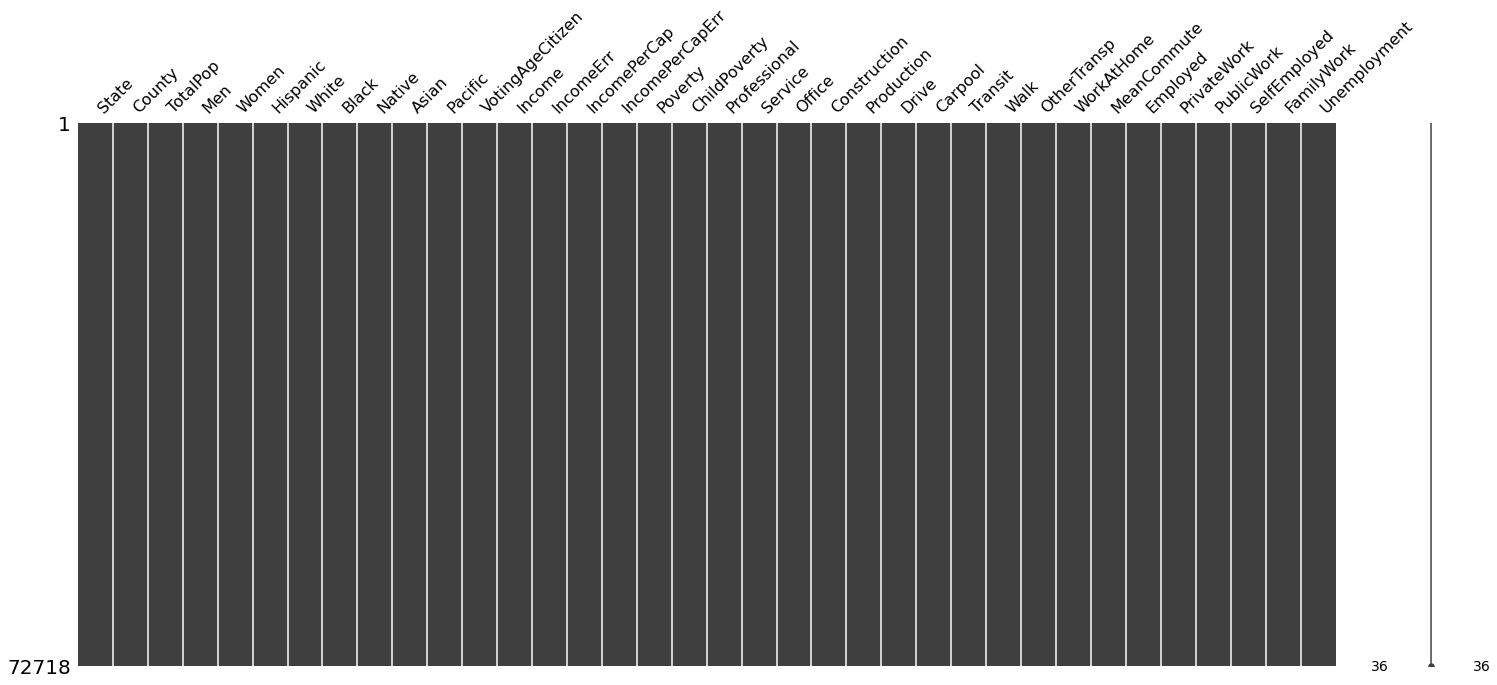

In [7]:
df = df[df.MeanCommute.notnull()]
mn.matrix(df)

We are happy with throwing these records out, because they are such a small portion of the data and without them the data is fairly complete.

## Balance the data

Balaning will take place before the train test split. That way the classes are defined the same for both, if the class lines were defined after the train test split the four class lines may be different

In [8]:
df['ChildPoverty'].describe()

count    72718.000000
mean        21.148476
std         18.572714
min          0.000000
25%          6.200000
50%         16.300000
75%         31.600000
max        100.000000
Name: ChildPoverty, dtype: float64

In [9]:
labels = ['low', 'med-low', 'med-high', 'high']
df['child_poverty_class'] = pd.qcut(df['ChildPoverty'],
                             q=4,
                             labels=labels)
df['child_poverty_class'].describe()

count     72718
unique        4
top         low
freq      18229
Name: child_poverty_class, dtype: object

In [10]:
df['child_poverty_class'].value_counts()

low         18229
med-low     18171
high        18170
med-high    18148
Name: child_poverty_class, dtype: int64

<AxesSubplot:>

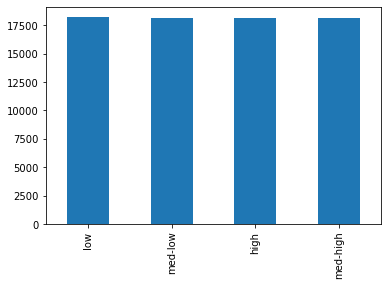

In [11]:
df['child_poverty_class'].value_counts().plot(kind='bar')

## Split the data

Size of X Train 58174
Size of X Test 14544
Size of y Train 58174
Size of y Test 14544


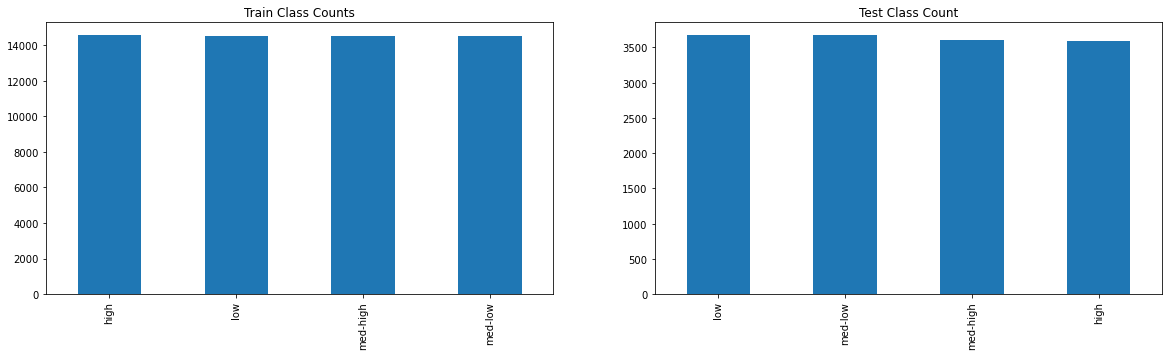

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_y = df['child_poverty_class']

X_train_df, X_test_df, y_train_df, y_test_df = \
    train_test_split(df, df_y, test_size=0.2)
print('Size of X Train', len(X_train_df))
print('Size of X Test', len(X_test_df))
print('Size of y Train', len(y_train_df))
print('Size of y Test', len(y_test_df))

fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
X_train_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Train Class Counts')
plt.subplot(1,2,2)
X_test_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Test Class Count')

X_train_df = X_train_df.drop(columns=['child_poverty_class','ChildPoverty'])

X_test_df = X_test_df.drop(columns=['child_poverty_class','ChildPoverty'])

# Pre-processing

## 2 Layer Perceptron 

In [13]:
#Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
#Original Author: Sebastian Raschka

import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1,random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.minibatches = minibatches
        self.shuffle = shuffle
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    

In [14]:
class TwoLayerPerceptron(TwoLayerPerceptronBase):
    def _feedforward(self, X, W1, W2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T
        
        
        # regularize weights that are not bias terms
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        
        #print( grad1, grad2)
        return grad1, grad2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                # momentum calculations
                delta_W1, delta_W2 = self.eta * grad1, self.eta * grad2
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                delta_W1_prev, delta_W2_prev = delta_W1, delta_W2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

In [15]:
code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
X_train = X_train_df.drop(columns=['State','County']).to_numpy()
y_train = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()

X_test = X_test_df.drop(columns=['State','County']).to_numpy()
y_test = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()

print(X_train.shape)
print(y_train)
print(X_test.shape)
print(y_test.shape)

(58174, 33)
[2 3 3 ... 2 3 3]
(14544, 33)
(14544,)


In [23]:
%%time 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

params = { 'n_hidden':50, 
         'C':0.1, 'epochs':300, 'eta':0.001, 
         'alpha':0.5, 'decrease_const':1e-5, 'minibatches':100,
         'shuffle':True,'random_state':1}



#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = TwoLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 300/300

Test acc: 0.25254400440044006
Wall time: 1min 44s


In [24]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))

0 3
0 0
0 3


### Graph Loss

MSE Loss :
Resubstitution acc: 0.2502148726235088
Validation acc: 0.25254400440044006


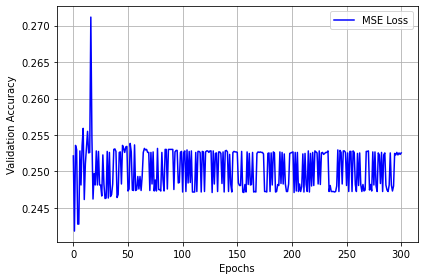

In [25]:
def print_result(nn,X_train,y_train,X_test,y_test,title="",color="red"):
    
    print("=================")
    print(title,":")
    yhat = nn.predict(X_train)
    print('Resubstitution acc:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation acc:',accuracy_score(y_test,yhat))
    
    if hasattr(nn,'val_score_'):
        plt.plot(range(len(nn.val_score_)), nn.val_score_, color=color,label=title)
        plt.ylabel('Validation Accuracy')
    else:
        plt.plot(range(len(nn.score_)), nn.score_, color=color,label=title)
        plt.ylabel('Resub Accuracy')
        
    plt.xlabel('Epochs')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.grid(True)
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

## 2 Layer Perceptron with Normalize 

In [26]:
from sklearn.preprocessing import normalize
X_train = X_train_df.drop(columns=['State','County'])
X_test = X_test_df.drop(columns=['State','County'])
X_train_df_norm = X_train.copy()
X_test_df_norm = X_test.copy()

# Force the sum to be 1 of all of the features
for col in X_train.columns:
    X_train_df_norm[col] = X_train[col] / np.linalg.norm(X_train[col])
    X_test_df_norm[col] = X_test[col] / np.linalg.norm(X_train[col])
X_train_df_norm.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
41411,0.003903,0.003375,0.004392,0.000645,0.000387,0.013515,0.000000,0.001304,0.0,0.004071,...,0.001672,0.000534,0.001256,0.006162,0.003937,0.003752,0.005311,0.004289,0.0,0.005066
21425,0.004059,0.004038,0.004056,0.000531,0.000109,0.015413,0.000000,0.000000,0.0,0.003663,...,0.000488,0.000000,0.000837,0.006085,0.002250,0.004167,0.003663,0.003259,0.0,0.013790
49774,0.003429,0.003246,0.003586,0.001577,0.004811,0.000311,0.000000,0.001712,0.0,0.003608,...,0.000557,0.005345,0.002162,0.003050,0.003240,0.003492,0.006306,0.004918,0.0,0.003846
30740,0.003178,0.003168,0.003168,0.001735,0.000182,0.013319,0.000477,0.000937,0.0,0.003104,...,0.000000,0.001470,0.002302,0.007128,0.003217,0.003067,0.009629,0.002344,0.0,0.004128
13416,0.002425,0.002421,0.002414,0.000875,0.004054,0.001080,0.000000,0.007255,0.0,0.002577,...,0.020756,0.014832,0.004534,0.003142,0.003151,0.004530,0.001884,0.003145,0.0,0.002674


In [27]:

code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
X_train = X_train_df_norm.to_numpy()
y_train = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()
X_test = X_test_df_norm.to_numpy()
y_test = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()


X_train_df_norm.head()
print(X_train.shape)
print(y_train)
print(X_test.shape)
print(y_test.shape)

(58174, 33)
[2 3 3 ... 2 3 3]
(14544, 33)
(14544,)


In [29]:
params = { 'n_hidden':30, 
         'C':0.1, 'epochs':100, 'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = TwoLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 100/100

Test acc: 0.42161716171617164


In [30]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))


0 3
0 3
0 3


### Graph Loss

MSE Loss :
Resubstitution acc: 0.4238319524186063
Validation acc: 0.42161716171617164


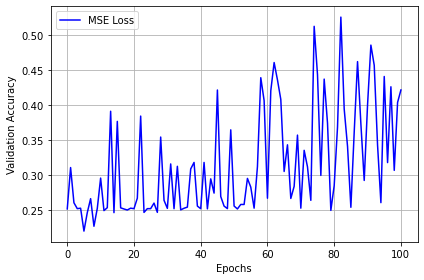

In [31]:
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

## 2 Layer Perceptron with One-Hot Encoding and Normalized


In [32]:
print(len(X_train_df))
print(len(pd.get_dummies(X_train_df['County'], prefix='County')))

58174
58174


0
Size of X Train 58174
Size of X Test 14544
Size of y Train 58174
Size of y Test 14544


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,one_State_South Dakota,one_State_Tennessee,one_State_Texas,one_State_Utah,one_State_Vermont,one_State_Virginia,one_State_Washington,one_State_West Virginia,one_State_Wisconsin,one_State_Wyoming
69647,0.001878,0.001963,0.001784,0.000646,0.004114,0.000000,0.022505,0.000162,0.001282,0.002134,...,0,0,0,0,0,0,1,0,0,0
72888,0.003972,0.003991,0.003929,0.000273,0.005905,0.000000,0.000091,0.000041,0.000000,0.004323,...,0,0,0,0,0,0,0,0,1,0
39445,0.004191,0.004239,0.004120,0.006102,0.003013,0.000984,0.000000,0.000325,0.000000,0.003249,...,0,0,0,0,0,0,0,0,0,0
13413,0.004191,0.004233,0.004123,0.002096,0.000986,0.010532,0.000182,0.001095,0.000000,0.004280,...,0,0,0,0,0,0,0,0,0,0
66630,0.003009,0.002942,0.003054,0.003518,0.002916,0.004429,0.000000,0.000000,0.000000,0.002823,...,0,0,1,0,0,0,0,0,0,0


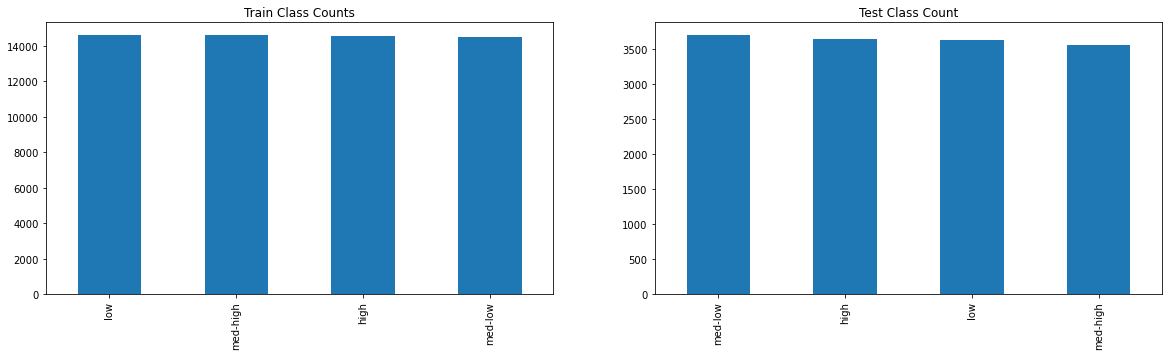

In [33]:
# One hot encoding from https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
X_one_hot_df = pd.concat([df,
                               pd.get_dummies(df['County'], prefix='one_County')],
                               axis=1)
X_one_hot_df.drop(['County'],axis=1, inplace=True)
X_one_hot_df = pd.concat([X_one_hot_df,
                           pd.get_dummies(X_one_hot_df['State'], prefix='one_State')],
                           axis=1)
X_one_hot_df.drop(['State'],axis=1, inplace=True)
print(len(X_one_hot_df[X_one_hot_df.TotalPop.isnull()]))

#Resplit the data.
df_y = df['child_poverty_class']

X_train_df, X_test_df, y_train_df, y_test_df = \
    train_test_split(X_one_hot_df, df_y, test_size=0.2)
print('Size of X Train', len(X_train_df))
print('Size of X Test', len(X_test_df))
print('Size of y Train', len(y_train_df))
print('Size of y Test', len(y_test_df))

fig = plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
X_train_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Train Class Counts')
plt.subplot(1,2,2)
X_test_df['child_poverty_class'].value_counts().plot(kind='bar')
plt.title('Test Class Count')

X_train_df = X_train_df.drop(columns=['child_poverty_class','ChildPoverty'])

X_test_df = X_test_df.drop(columns=['child_poverty_class','ChildPoverty'])

#Normalize the data Force the sum to be 1 of all of the features
X_train_df_norm = X_train_df.copy()
X_test_df_norm = X_test_df.copy()

for col in X_train_df.columns:
    if col[0:3] != 'one':
        X_train_df_norm[col] = X_train_df[col] / np.linalg.norm(X_train_df[col])
        X_test_df_norm[col] = X_test_df[col] / np.linalg.norm(X_train_df[col])
X_train_df_norm.head()


In [34]:
X_train = X_train_df_norm.to_numpy()

code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
y_train = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()
X_test = X_test_df_norm.to_numpy()
y_test = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()



In [36]:
%%time
from sklearn.metrics import accuracy_score
params = { 'n_hidden':100,
         'C':0.1, 'epochs':100,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = TwoLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 100/100

Test acc: 0.38833883388338836
Wall time: 4min 32s


In [37]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))

0 3
0 3
0 3


### Graph Accuracy

MSE Loss :
Resubstitution acc: 0.4117647058823529
Validation acc: 0.38833883388338836


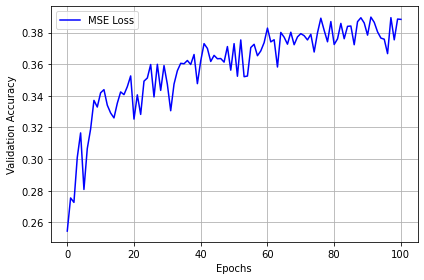

In [38]:

print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

## Compare Results for 2 Layer Perceptrons

# Modeling

For the rest of the lab we are going to switch to Binary cross Entropy as the objective function since it will train faster. The only thing that will change is the first calculation of V's
## 3 Layer


In [39]:
# Taken from the two layer perceptron
class ThreeLayerPerceptronBase(object):
    def __init__(self, n_hidden1=30, n_hidden2=30,
                 C=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1,random_state=None):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.minibatches = minibatches
        self.shuffle = shuffle
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_ + 1))
        W1[:,:1] = 0
        init_bound = 4*np.sqrt(6. / (self.n_hidden2 + self.n_hidden1 + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1 + 1))
        W2[:,:1] = 0
        
        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden2 + 1))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden2 + 1))
        W3[:,:1] = 0
        
        return W1, W2, W3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2,W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2, W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2,W3)
        return cost + L2_term
    

In [40]:
class ThreeLayerPerceptron(ThreeLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, W3):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer 1.
        W1: Weight matrix for input layer -> hidden layer 2.
        W3: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a4 : activations into layer (or output layer)
        z1-z3 : layer inputs
        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        #added code
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._sigmoid(Z3)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
    
        # vectorized backpropagation
        # Old Way
        #V3 = -2*(Y_enc-A4)*A4*(1-A4)
        # Using Binary Cross Entroy
        grad3 = V3 @ A3.T
        grad3[:, 1:] += W3[:, 1:] * self.l2_C
        
        V2 = (A3*(1-A3)*((W3).T @ V3))
        grad2 = V2[1:,:] @ A2.T
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        
        V1 = A2*(1-A2)*((W2).T @ V2[1:,:])
        grad1 = V1[1:,:] @ A1.T
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        
        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, _, _, A4 = self._feedforward(X, self.W1, self.W2, self.W3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()

        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)
        delta_W3_prev = np.zeros(self.W3.shape)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,self.W3)
                
                cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grad1, grad2, grad3 = self._get_gradient(
                                         A1=A1, A2=A2, A3=A3, A4=A4,
                                         Z1=Z1, Z2=Z2, Z3=Z3,
                                         Y_enc=Y_enc[:, idx],
                                         W1=self.W1,W2=self.W2,W3=self.W3)

                # momentum calculations
                delta_W1 = self.eta * grad1
                delta_W2 = self.eta * grad2
                delta_W3 = self.eta * grad3
                self.W1 -= (delta_W1 + (self.alpha * delta_W1_prev))
                self.W2 -= (delta_W2 + (self.alpha * delta_W2_prev))
                self.W3 -= (delta_W3 + (self.alpha * delta_W3_prev))
                delta_W1_prev = delta_W1
                delta_W2_prev = delta_W2
                delta_W3_prev = delta_W3

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

In [41]:
X_train = X_train_df_norm.to_numpy()

code_classes = {"child_poverty_class": {'low':0, 'med-low':1, 'med-high':2, 'high':3}}
y_train = y_train_df.to_frame().replace(code_classes).to_numpy().ravel()
X_test = X_test_df_norm.to_numpy()
y_test = y_test_df.to_frame().replace(code_classes).to_numpy().ravel()


Epoch: 1000/1000

Test acc: 0.5630500550055005
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.6128682916766941
Validation acc: 0.5630500550055005


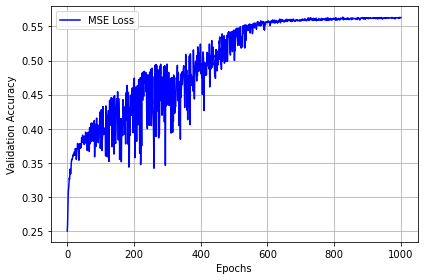

Wall time: 35min 18s


In [44]:
%%time
from sklearn.metrics import accuracy_score
params = { 'n_hidden1':25, 'n_hidden2':12,
         'C':0.01, 'epochs':1000,'eta':0.001, 
         'alpha':0.1, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = ThreeLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

## N-Layer

In [46]:
# Taken from the two layer perceptron
class NLayerPerceptronBase(object):
    def __init__(self, hidden_layers=(100,100),
                 C=0.0, epochs=500, eta=0.001, alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1,random_state=None):
        np.random.seed(random_state)
        self.hidden_layers = hidden_layers
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.minibatches = minibatches
        self.shuffle = shuffle
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        Ws = []
        init_bound = 4*np.sqrt(6. / (self.hidden_layers[0] + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.hidden_layers[0], self.n_features_ + 1))
        W1[:,:1] = 0
        Ws.append(W1)
        for i in range(1,len(self.hidden_layers)):
            init_bound = 4*np.sqrt(6. / (self.hidden_layers[i] + self.hidden_layers[i-1] + 1))
            W_i = np.random.uniform(-init_bound, init_bound,(self.hidden_layers[i], self.hidden_layers[i-1] + 1))
            W_i[:,:1] = 0
            Ws.append(W_i)
            
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.hidden_layers[-1] + 1))
        W_n = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.hidden_layers[-1] + 1))
        W_n[:,:1] = 0
        Ws.append(W_n)
        
        return Ws
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, Ws):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        mean_sqaure_sum = 0
        for W in Ws:
            mean_sqaure_sum += np.mean(W[:,1:] ** 2)
            
        return (lambda_/2.0) * np.sqrt(mean_sqaure_sum)
    
    def _cost(self,A_n,Y_enc, Ws):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A_n)**2)
        L2_term = self._L2_reg(self.l2_C, Ws)
        return cost + L2_term
    

In [48]:
class NLayerPerceptron(NLayerPerceptronBase):
    def _feedforward(self, X, Ws):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        Ws: list for weights at each layer
        As: list for activation into each layer (or output)
        Zs: list for each layer inputs
        ----------
        """
        As = []
        
        A1 = X.T
        As.append(A1)
        
        Zs = []
        for W in Ws:
            As[-1] = self._add_bias_unit(As[-1], how='row')
            Zs.append(W @ As[-1])
            As.append(self._sigmoid(Zs[-1]))
        
        return As, Zs
    
    def _get_gradient(self, As, Zs, Y_enc, Ws):
        """ Compute gradient step using backpropagation.
        """
        grads = []
        
        # vectorized backpropagation
        V_N = -2*(Y_enc-As[-1])*As[-1]*(1-As[-1])
        grad_N = V_N @ As[-2].T
        grad_N[:, 1:] += Ws[-1][:, 1:] * self.l2_C
        grads.append(grad_N)
        
        V_N_1 = As[-2]*(1-As[-2])*((Ws[-1].T) @ V_N)
        grad_N_1 = V_N_1[1:,:] @ As[-3].T
        grad_N_1[:, 1:] += Ws[-2][:, 1:] * self.l2_C
        grads.append(grad_N_1)
        
        V_last = V_N_1
        # Loop from the Third to last W, to the begining of the list of Ws
        for n in range(len(Ws)-3, -1, -1):
            temp1 = As[n+1]*(1 - As[n+1])
            temp2 = (Ws[n+1].T @ V_last[1:,:])
            V_n = As[n+1]*(1 - As[n+1])*(Ws[n+1].T @ V_last[1:,:])
            grad_n = V_n[1:,:] @ As[n].T
            grad_n[:, 1:] += Ws[n][:, 1:] * self.l2_C
            grads.append(grad_n)
            V_last = V_n
            
        grads.reverse()
        
        return grads
    
    def predict(self, X):
        """Predict class labels"""
        Zs, As = self._feedforward(X, self.Ws)
        y_pred = np.argmax(As[-1], axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        deltas_prev = []
        for W in self.Ws:
            delta_n = np.zeros(W.shape)
            deltas_prev.append(delta_n)
        
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                As, Zs = self._feedforward(X_data[idx], self.Ws)
                
                cost = self._cost(As[-1],Y_enc[:, idx],self.Ws)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(As=As, Ws=self.Ws, Zs=Zs,Y_enc=Y_enc[:, idx])

                # momentum calculations
                for W, grad, i in zip(self.Ws, grads,range(0,len(self.Ws))):
                    delta = self.eta * grad
                    self.Ws[i] -= (delta + (self.alpha*deltas_prev[i]))
                    deltas_prev[i] = delta
                
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

## Redo 3 Layer to prove it works

In [53]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(25,12),
         'C':0.1, 'epochs':600,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':100,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 600/600

Test acc: 0.5195269526952695
Wall time: 23min


0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5413414927630901
Validation acc: 0.5195269526952695


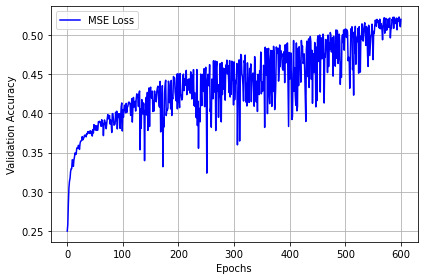

In [54]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

## 4 Layer

Epoch: 800/800

Test acc: 0.5560368536853685
MSE Loss :
Resubstitution acc: 0.5814968886444116
Validation acc: 0.5560368536853685


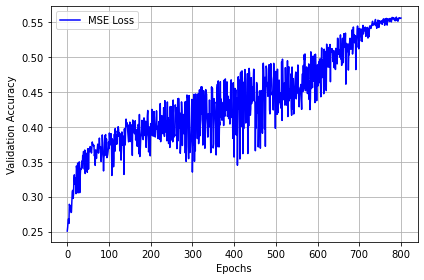

Wall time: 32min 48s


In [61]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(50,25,10),
         'C':0.1, 'epochs':800,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

## 5 Layer

In [62]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.1, 'epochs':800,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=10,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

Epoch: 800/800

Test acc: 0.539535203520352
Wall time: 37min 54s


0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5654416062158353
Validation acc: 0.539535203520352


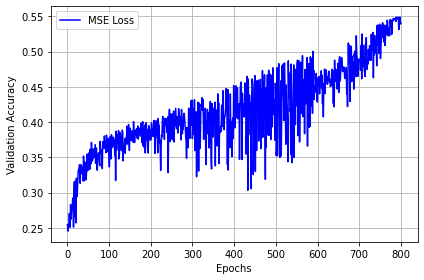

In [63]:
print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

Epoch: 1500/1500

Test acc: 0.5688256325632564
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5947674218723141
Validation acc: 0.5688256325632564


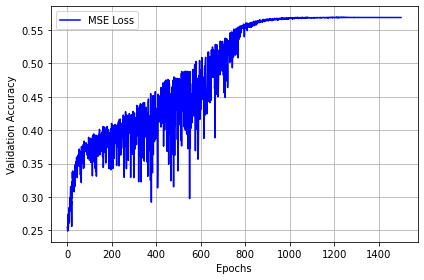

Wall time: 1h 15min 42s


In [70]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.1, 'epochs':1500,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':100,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

Epoch: 1500/1500

Test acc: 0.533003300330033
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5372675078213635
Validation acc: 0.533003300330033


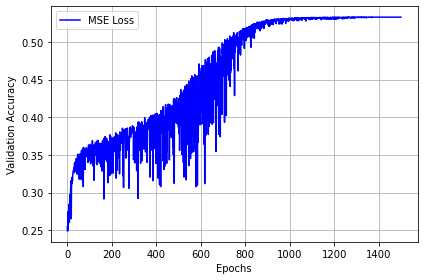

Wall time: 1h 31min 50s


In [72]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.1, 'epochs':1500,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':200,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

In [73]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.01, 'epochs':1000,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':200,
         'shuffle':True,'random_state':1}

#X_train, X_test, y_train, y_test = train_test_split(X_nums,y_nums,test_size = 0.2)

nn = NLayerPerceptron(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

Epoch: 616/1000

KeyboardInterrupt: 

## Just see

## 5 Layer Adaptive Learning with AdaGrad

In [96]:
class NLayerPerceptronAdaGrad(NLayerPerceptron):
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        deltas_prev = []
        for W in self.Ws:
            delta_n = np.zeros(W.shape)
            deltas_prev.append(delta_n)
        
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        
        # init the Adda grad values to 0
        Gs_prev = []
        for W in self.Ws:
            G = np.zeros(W.shape)
            Gs_prev.append(G)
            
            
        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                As, Zs = self._feedforward(X_data[idx], self.Ws)
                
                cost = self._cost(As[-1],Y_enc[:, idx],self.Ws)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(As=As, Ws=self.Ws, Zs=Zs,Y_enc=Y_enc[:, idx])
                
                Gs = []
                for grad, i in zip(grads, range(0,len(grads))):
                    Gs.append(Gs_prev[i] + grad*grad)
                
                #etas = self.eta / np.sqrt(Gs+0.000001)
                #self.Ws = self.Ws - etas*grads
                
                for W, grad, i in zip(self.Ws, grads,range(0,len(self.Ws))):
                    rho = self.eta / np.sqrt((Gs[i]+0.0001))*grad
                    self.Ws[i] -= rho
                
                # momentum calculations
                #for W, grad, i in zip(self.Ws, grads,range(0,len(self.Ws))):
                #    delta = self.eta * grad
                #    self.Ws[i] -= (delta + (self.alpha*deltas_prev[i]))
                #    deltas_prev[i] = delta
                
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

Epoch: 200/200

Test acc: 0.5429042904290429
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5650118609688177
Validation acc: 0.5429042904290429


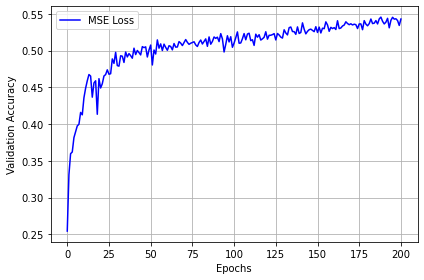

Wall time: 13min 4s


In [97]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.01, 'epochs':200,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':200,
         'shuffle':True,'random_state':1}

nn = NLayerPerceptronAdaGrad(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

Epoch: 400/400

Test acc: 0.5696507150715071
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5860693780726786
Validation acc: 0.5696507150715071


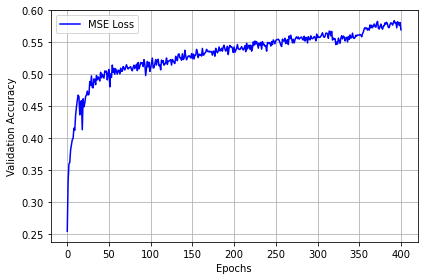

Wall time: 26min 20s


In [98]:
%%time
from sklearn.metrics import accuracy_score
params = { 'hidden_layers':(100,50,25,10),
         'C':0.01, 'epochs':400,'eta':0.001, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':200,
         'shuffle':True,'random_state':1}

nn = NLayerPerceptronAdaGrad(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()

# 5 Layer AdaM

In [134]:
class NLayerPerceptronAdam(NLayerPerceptron):
    def __init__(self, beta_1, beta_2, **params):
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
        super().__init__(**params)
        
        
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.Ws = self._initialize_weights()

        deltas_prev = []
        for W in self.Ws:
            delta_n = np.zeros(W.shape)
            deltas_prev.append(delta_n)
        
        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        # get starting acc
        
        # init the Adda grad values to 0
        Mk_prev = []
        Vk_prev = []
        for W in self.Ws:
            M = np.zeros(W.shape)
            Mk_prev.append(M)
            V = np.zeros(W.shape)
            Vk_prev.append(V)
        
        
        for k in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*k)

            if print_progress>0 and (k+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (k+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                As, Zs = self._feedforward(X_data[idx], self.Ws)
                
                cost = self._cost(As[-1],Y_enc[:, idx],self.Ws)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                grads = self._get_gradient(As=As, Ws=self.Ws, Zs=Zs,Y_enc=Y_enc[:, idx])
                
                M_k = []
                V_k = []
                for grad, i in zip(grads, range(0,len(grads))):
                    M_k.append(self.beta_1 * Mk_prev[i] + (1-self.beta_1) * grads[i])
                    V_k.append(self.beta_2 * Vk_prev[i] + ((1-self.beta_2) *(grads[i]*grads[i])))
                    
                for W, grad, M, V, i in zip(self.Ws, grads, M_k, V_k, range(0,len(self.Ws))):
                    # boost momentums
                    M_k_hat = M / (1-np.power(self.beta_1,k+1))
                    V_k_hat = V / (1-np.power(self.beta_2,k+1))
                    ##update radient
                    self.Ws[i] -= self.eta*(M_k_hat/np.sqrt(V_k_hat + 1e-4))                 
                
            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
        return self

Epoch: 500/500

Test acc: 0.5513613861386139
0 3
0 3
0 3
MSE Loss :
Resubstitution acc: 0.5946642830130299
Validation acc: 0.5513613861386139


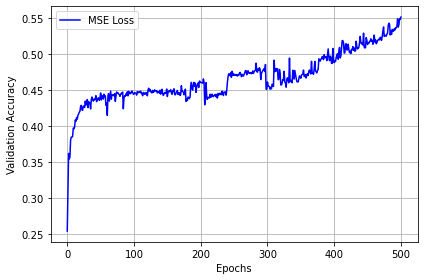

Wall time: 31min 8s


In [142]:
%%time
from sklearn.metrics import accuracy_score
params = { 'beta_1':0.9, 'beta_2':0.999,
          'hidden_layers':(100,50,25,10), 
         'C':0.01, 'epochs':500,'eta':0.005, 
         'alpha':0.001, 'decrease_const':1e-5, 'minibatches':50,
         'shuffle':True,'random_state':1}

nn = NLayerPerceptronAdam(**params)
nn.fit(X_train, y_train, print_progress=1,XY_test=(X_test,y_test))
yhat = nn.predict(X_test)
print('Test acc:',accuracy_score(y_test,yhat))

print(min(y_test),max(y_test))
print(min(yhat),max(yhat))
print(min(y_train),max(y_train))
print_result(nn,X_train,y_train,X_test,y_test,title="MSE Loss",color="blue")

plt.show()